## Lead Scoring: Logistic Regression 

### Importing and Merging Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set()

In [3]:
# Importing data
leads = pd.read_csv("leads.csv")


In [4]:
print(len(leads))

9240


### Let's understand the structure of our dataframe

In [5]:
leads.shape

(9240, 37)

In [6]:
# Let's see the head of our master dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
leads.describe()  #Describe numerical data

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
leads[leads.Converted==1].describe()  #Describe numerical data

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,3561.000000,3561.0,3461.000000,3561.000000,3461.000000,1908.000000,1908.000000
mean,617931.981185,1.0,3.633632,738.546757,2.353638,14.603774,16.850629
std,22780.974851,0.0,5.564011,615.656010,2.139276,0.884657,1.913772
min,579533.000000,1.0,0.000000,0.000000,0.000000,10.000000,11.000000
25%,598110.000000,1.0,0.000000,0.000000,0.000000,14.000000,15.000000
50%,617035.000000,1.0,3.000000,832.000000,2.000000,15.000000,17.000000
75%,637409.000000,1.0,5.000000,1268.000000,3.500000,15.000000,18.000000
max,660727.000000,1.0,251.000000,2253.000000,24.000000,17.000000,20.000000


In [10]:
leads[leads.Converted==0].describe()  #Describe numerical data

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5679.000000,5679.0,5642.000000,5679.000000,5642.000000,3114.000000,3114.000000
mean,616722.197570,0.0,3.329670,330.404473,2.368453,14.123956,16.035003
std,23779.666878,0.0,4.359668,432.231915,2.175058,1.592037,1.672051
min,579545.000000,0.0,0.000000,0.000000,0.000000,7.000000,11.000000
25%,595729.000000,0.0,1.000000,16.000000,1.000000,13.000000,15.000000
50%,614218.000000,0.0,3.000000,179.000000,2.000000,14.000000,15.000000
75%,637381.500000,0.0,4.000000,393.000000,3.000000,15.000000,18.000000
max,660737.000000,0.0,141.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
leads[leads.Converted==1].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,3561.000000,3561.0,3461.000000,3561.000000,3461.000000,1908.000000,1908.000000
mean,617931.981185,1.0,3.633632,738.546757,2.353638,14.603774,16.850629
std,22780.974851,0.0,5.564011,615.656010,2.139276,0.884657,1.913772
min,579533.000000,1.0,0.000000,0.000000,0.000000,10.000000,11.000000
25%,598110.000000,1.0,0.000000,0.000000,0.000000,14.000000,15.000000
50%,617035.000000,1.0,3.000000,832.000000,2.000000,15.000000,17.000000
75%,637409.000000,1.0,5.000000,1268.000000,3.500000,15.000000,18.000000
max,660727.000000,1.0,251.000000,2253.000000,24.000000,17.000000,20.000000


In [12]:
leads.describe(include=["O"])  #Describe categorical data

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,...,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,...,5,1,1,6,7,3,3,1,2,16
top,94b60093-49cd-41f5-be6e-ebc3c009ae54,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,...,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,...,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


## Treating Null Values

In [13]:
round(leads.isnull().sum()/len(leads.index)*100,2) 
# see many columns have high null %

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
df=leads.drop_duplicates(keep='first') #drop duplicates keep first instance of duplicate. No duplicates from shape
df.shape   #New DF

(9240, 37)

Replace Select by null

In [15]:
df.isnull().sum().sum()

41039

In [16]:
df=df.replace(to_replace = "Select",value= np.nan)
df=df.replace(to_replace = "select",value= np.nan)

In [17]:
df.isnull().sum().sum()  #54419-41039 Select have been converted to null

54419

In [18]:
# Create function to check distribution/ variation in each column - name, unique values, isnull, dtype
def unique_col_values(d):
    for column in d:
        print("{}  | {} | {} | {}| {} ".format(d[column].name, len(d[column].unique()), d[column].isnull().sum(), round(d[column].isnull().sum()/len(d.index)*100,2), d[column].dtype))
        
unique_col_values(df)

Prospect ID  | 9240 | 0 | 0.0| object 
Lead Number  | 9240 | 0 | 0.0| int64 
Lead Origin  | 5 | 0 | 0.0| object 
Lead Source  | 22 | 36 | 0.39| object 
Do Not Email  | 2 | 0 | 0.0| object 
Do Not Call  | 2 | 0 | 0.0| object 
Converted  | 2 | 0 | 0.0| int64 
TotalVisits  | 42 | 137 | 1.48| float64 
Total Time Spent on Website  | 1731 | 0 | 0.0| int64 
Page Views Per Visit  | 115 | 137 | 1.48| float64 
Last Activity  | 18 | 103 | 1.11| object 
Country  | 39 | 2461 | 26.63| object 
Specialization  | 19 | 3380 | 36.58| object 
How did you hear about X Education  | 10 | 7250 | 78.46| object 
What is your current occupation  | 7 | 2690 | 29.11| object 
What matters most to you in choosing a course  | 4 | 2709 | 29.32| object 
Search  | 2 | 0 | 0.0| object 
Magazine  | 1 | 0 | 0.0| object 
Newspaper Article  | 2 | 0 | 0.0| object 
X Education Forums  | 2 | 0 | 0.0| object 
Newspaper  | 2 | 0 | 0.0| object 
Digital Advertisement  | 2 | 0 | 0.0| object 
Through Recommendations  | 2 | 0 | 0.0| o

In [19]:
# Using Baove Delete columns which have single unique value.No Variance

single_columns = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


df=leads.drop(single_columns, axis=1)   
df.shape

(9240, 32)

In [20]:
round(df.Converted.value_counts()/df.Converted.value_counts().sum()*100,2)

#38.5% conversion rate of leads

0    61.46
1    38.54
Name: Converted, dtype: float64

In [21]:
## Columns with high null values >25%

high_null_col=['Country','City','Specialization', 'How did you hear about X Education','What is your current occupation' , 'Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [22]:
#Seems tool long name - giving errors. Treat it seperately
df['What matters most to you in choosing a course'].value_counts()  #High null value and almost same option 'Better Career Prospects ' chosen so can be dropped. No variabce here

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
high_null_col

['Country',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [24]:
#Value_Count for multiple columns

def value_counts_col(d):
    for column in d:
        print("|{}\n{} \n {}  ".format(d[column].name, d[column].value_counts(), d[column].value_counts().sum()))
        
value_counts_col(df[high_null_col])

|Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
Ghana                      2
Italy                      2
Asia/Pacific Region        2
China                      2
Belgium                    2
Uganda                     2
Bangladesh                 2
Netherlands                2
Philippines                2
Indonesia                  1
Liberia                    1
Malaysia                   1
Russia                     1
Denmark                    1
Vietnam                    1
Kenya

In [25]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [26]:
## removing country and city - will try to treat it by using combination. Perhaps with combination null values will reduce

high_null_col1=['Specialization', 'How did you hear about X Education','What is your current occupation' , 'Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score']


#Run EDA on these columns

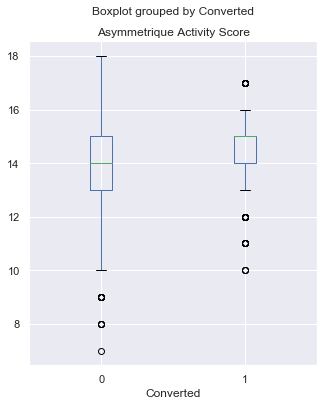

In [27]:
df.boxplot('Asymmetrique Activity Score', 'Converted', rot = 0,figsize=(5,6))
# Activity score spread is lower for converted and median score is higher

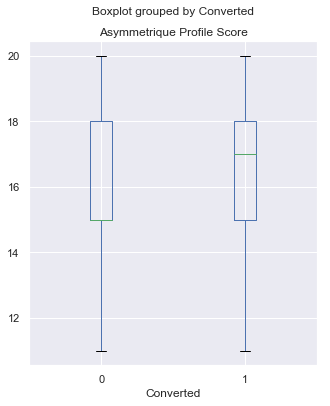

In [28]:
df.boxplot('Asymmetrique Profile Score', 'Converted', rot = 0,figsize=(5,6))
#Median is higher when converted

Text(0.5, 1.0, 'Tags - Non Converted')

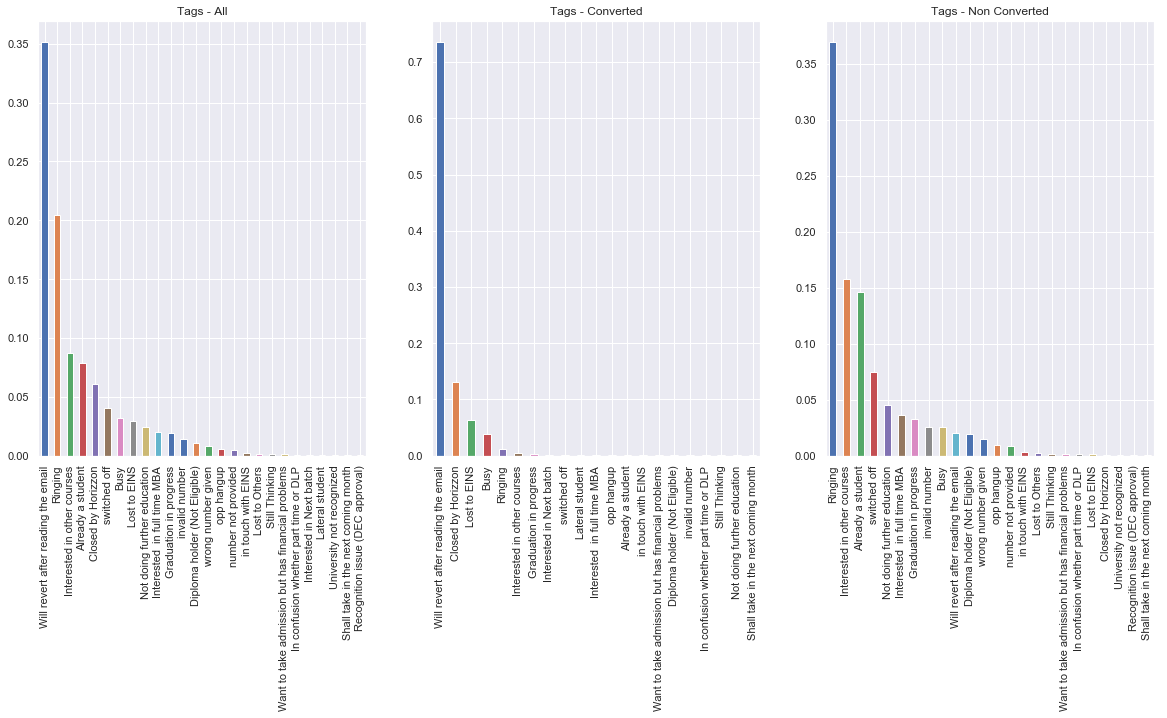

In [29]:
#Check how Tag affects convertion rate. Remarkable how - Will revert after reading email has very high convertion ratio
#Similarly - ringing means unlikely to convert.

# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df.Tags.value_counts()/(df.Tags.value_counts().sum())).plot(kind='bar', rot = 90).set_title('Tags - All')

plt.subplot(1, 3, 2)
(df[df.Converted==1].Tags.value_counts()/(df[df.Converted==1].Tags.value_counts().sum())).plot(kind='bar', rot = 90).set_title('Tags - Converted')

plt.subplot(1, 3, 3)
(df[df.Converted==0].Tags.value_counts()/(df[df.Converted==0].Tags.value_counts().sum())).plot(kind='bar', rot = 90).set_title('Tags - Non Converted')

In [30]:
order=['Might be', 'Not Sure', 'High in Relevance', 'Worst', 'Low in Relevance']
       


Text(0.5, 1.0, 'Lead Quality -Non Converted')

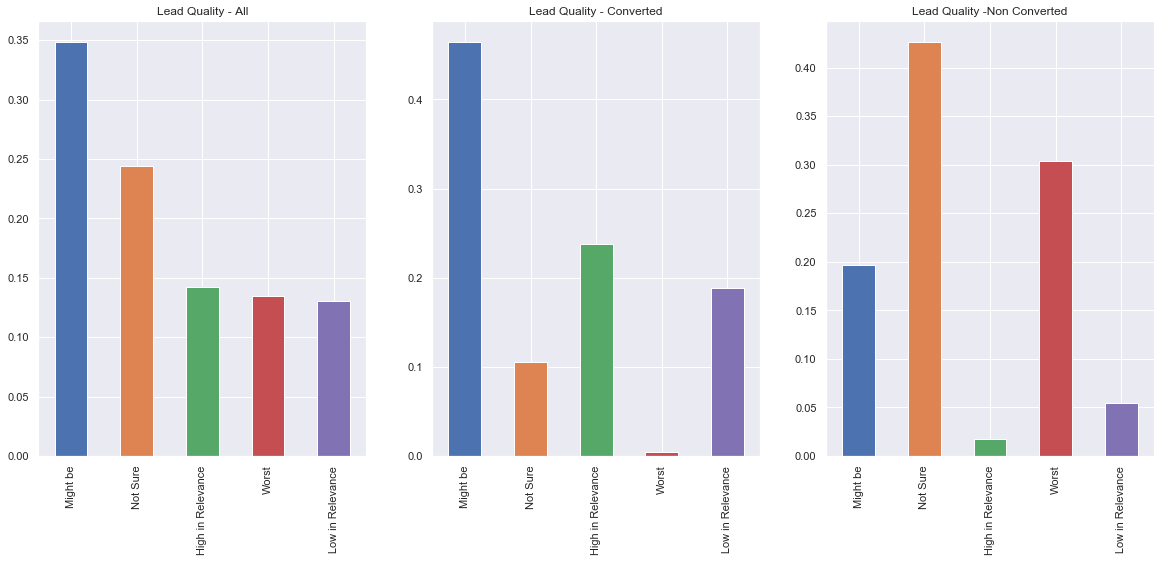

In [31]:
#Check how lead Quality affects convertion rate by normalizing. 


# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df['Lead Quality'].value_counts().loc[order]/(df['Lead Quality'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Lead Quality - All')

plt.subplot(1, 3, 2)
(df[df.Converted==1]['Lead Quality'].value_counts().loc[order]/(df[df.Converted==1]['Lead Quality'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Lead Quality - Converted')

plt.subplot(1, 3, 3)
(df[df.Converted==0]['Lead Quality'].value_counts().loc[order]/(df[df.Converted==0]['Lead Quality'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Lead Quality -Non Converted')


In [32]:
df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [33]:
order=['02.Medium','01.High','03.Low'] 

Text(0.5, 1.0, 'Activity Index -Non Converted')

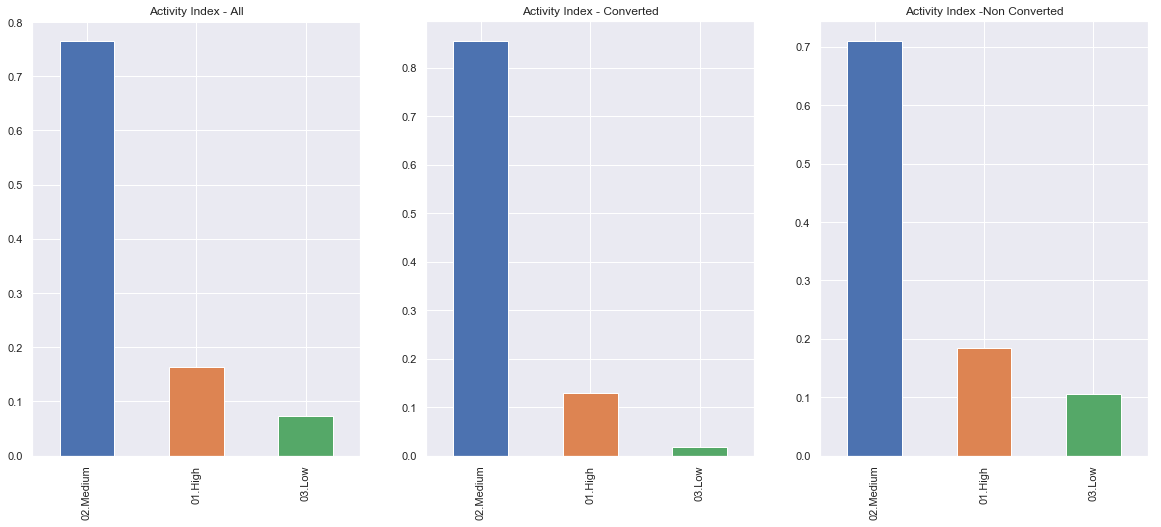

In [34]:
#Asymmetrique Activity Index. Does not look valuable.

# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df['Asymmetrique Activity Index'].value_counts().loc[order]/(df['Asymmetrique Activity Index'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Activity Index - All')

plt.subplot(1, 3, 2)
(df[df.Converted==1]['Asymmetrique Activity Index'].value_counts().loc[order]/(df[df.Converted==1]['Asymmetrique Activity Index'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Activity Index - Converted')

plt.subplot(1, 3, 3)
(df[df.Converted==0]['Asymmetrique Activity Index'].value_counts().loc[order]/(df[df.Converted==0]['Asymmetrique Activity Index'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Activity Index -Non Converted')


In [35]:
df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [36]:
order=['02.Medium','01.High','03.Low'] 

Text(0.5, 1.0, 'Profile Index -Non Converted')

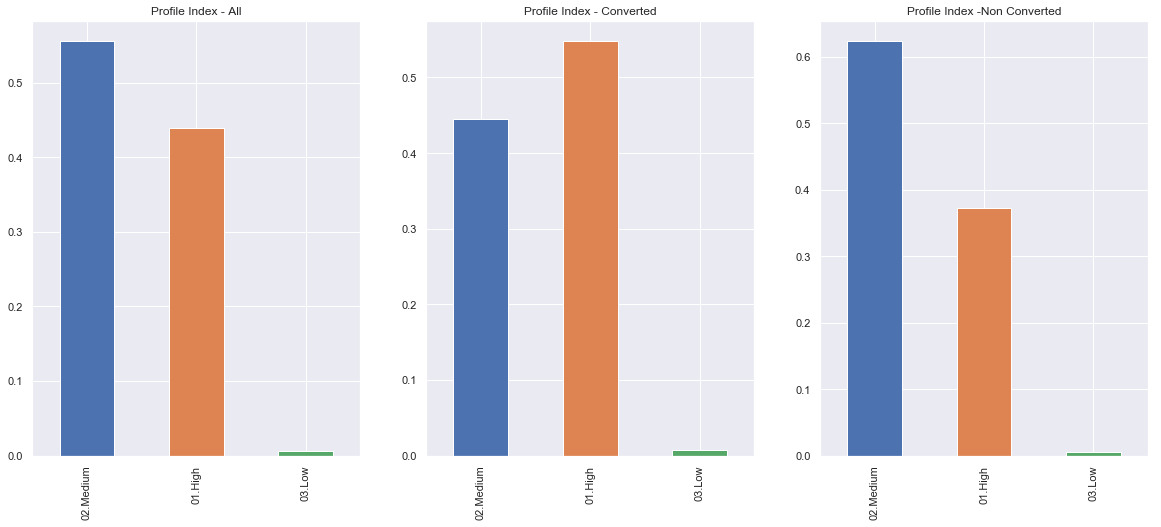

In [37]:
#Asymmetrique Profile Index. Presence of high in converted

# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df['Asymmetrique Profile Index'].value_counts().loc[order]/(df['Asymmetrique Profile Index'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Profile Index - All')

plt.subplot(1, 3, 2)
(df[df.Converted==1]['Asymmetrique Profile Index'].value_counts().loc[order]/(df[df.Converted==1]['Asymmetrique Profile Index'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Profile Index - Converted')

plt.subplot(1, 3, 3)
(df[df.Converted==0]['Asymmetrique Profile Index'].value_counts().loc[order]/(df[df.Converted==0]['Asymmetrique Profile Index'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Profile Index -Non Converted')


In [38]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Text(0.5, 1.0, 'Specialization - Not Converted')

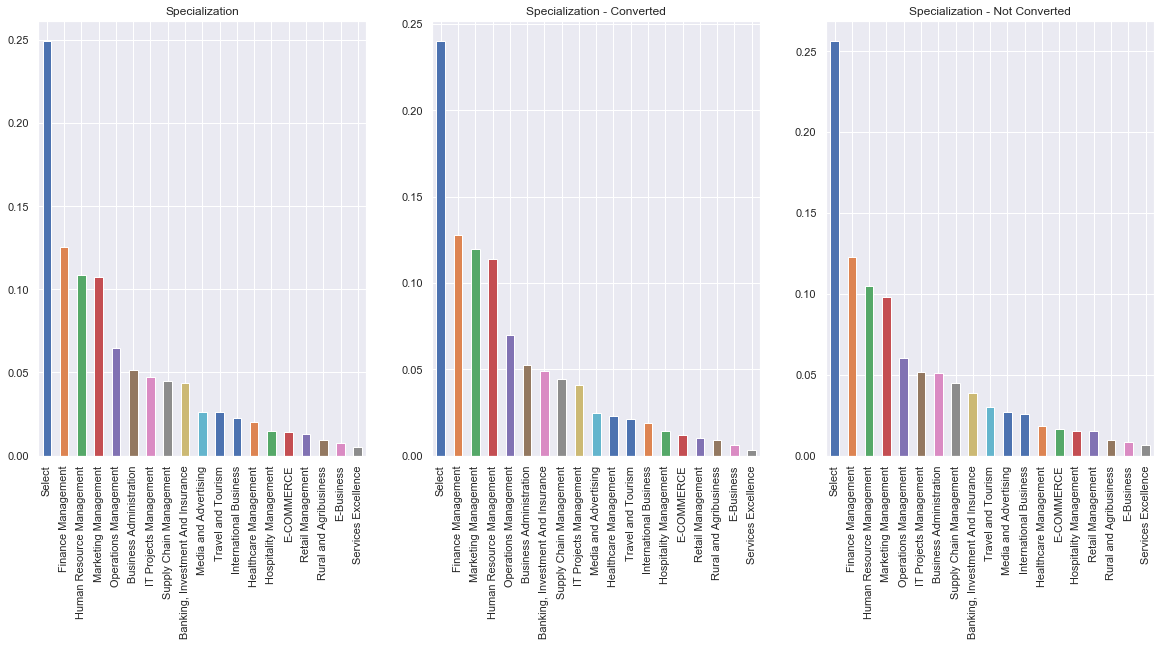

In [39]:
#Specialization EDA. NO impact of education on converstion from bar charts

# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df['Specialization'].value_counts()/(df['Specialization'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Specialization')

plt.subplot(1, 3, 2)
(df[df.Converted==1]['Specialization'].value_counts()/(df[df.Converted==1]['Specialization'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Specialization - Converted')

plt.subplot(1, 3, 3)
(df[df.Converted==0]['Specialization'].value_counts()/(df[df.Converted==0]['Specialization'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Specialization - Not Converted')

In [40]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Text(0.5, 1.0, 'How did you hear about X Education - NOt converted')

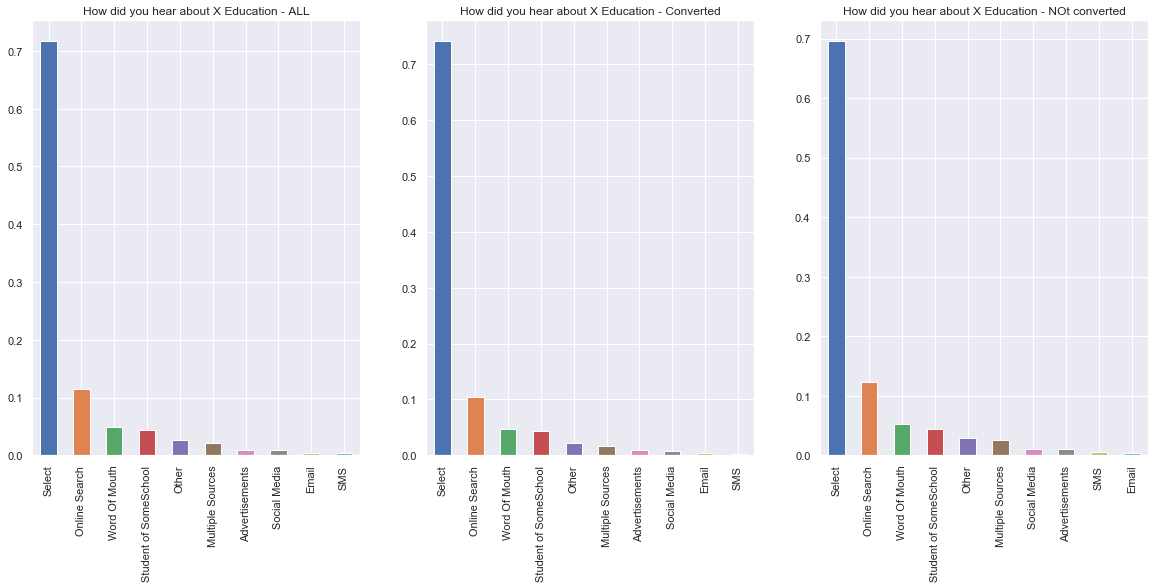

In [41]:
#How did you hear about X Education EDA. NO impact on converstion from bar charts

# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df['How did you hear about X Education'].value_counts()/(df['How did you hear about X Education'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('How did you hear about X Education - ALL')

plt.subplot(1, 3, 2)
(df[df.Converted==1]['How did you hear about X Education'].value_counts()/(df[df.Converted==1]['How did you hear about X Education'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('How did you hear about X Education - Converted')

plt.subplot(1, 3, 3)
(df[df.Converted==0]['How did you hear about X Education'].value_counts()/(df[df.Converted==0]['How did you hear about X Education'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('How did you hear about X Education - NOt converted')


In [42]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Text(0.5, 1.0, 'Lead Profile - ALL')

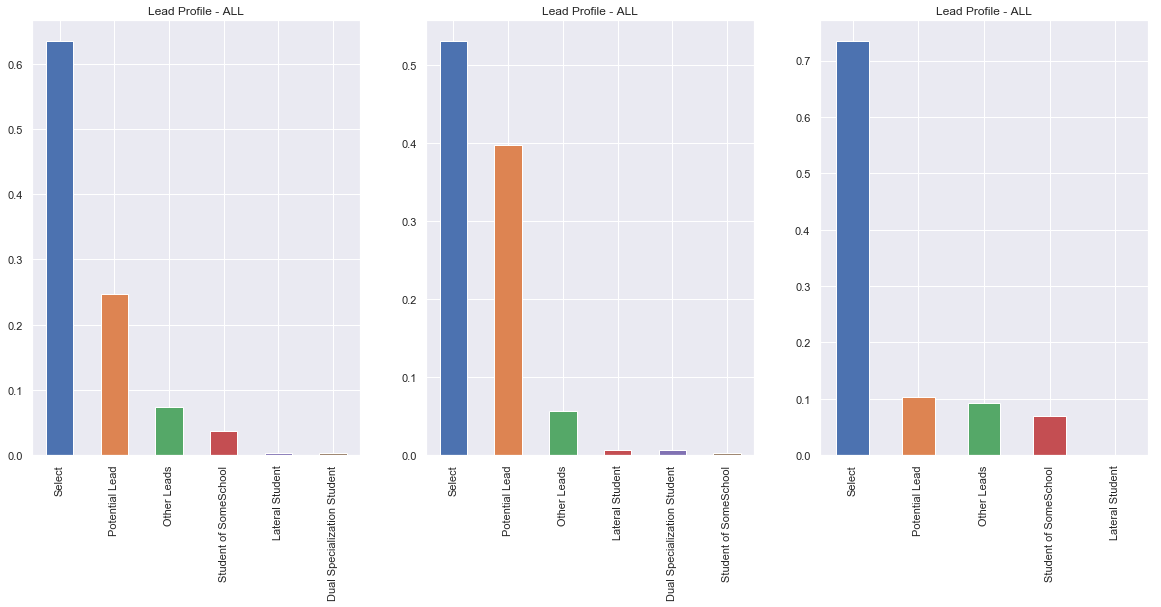

In [43]:
#Lead Profil EDA. 'Potential Lead' has higher change of conversion and 'Student of anaother school' very less chance to convert
#Has high nulls and null hence will not be able to to put in model. Delete

# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df['Lead Profile'].value_counts()/(df['Lead Profile'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Lead Profile - ALL')
df[df.Converted==0]
plt.subplot(1, 3, 2)
(df[df.Converted==1]['Lead Profile'].value_counts()/(df[df.Converted==1]['Lead Profile'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Lead Profile - ALL')

plt.subplot(1, 3, 3)
(df[df.Converted==0]['Lead Profile'].value_counts()/(df[df.Converted==0]['Lead Profile'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Lead Profile - ALL')


In [44]:
high_null_col

['Country',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

## From the high null features will try to retain 
1)country and city - will try to treat it by using combination of both to reduce nulls


In [45]:
#Remove country, city and tag from high_null_col

high_null_col1=['Specialization', 'Tags', 'How did you hear about X Education','What is your current occupation' , 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [46]:
#Dropping these columns as nulls cannot be imputed. We can try bring them back after building model and compare 
df=df.drop(high_null_col1,1)

In [47]:
df=df.drop(['Prospect ID','Lead Number'],1)

In [48]:
df=df.drop(['What matters most to you in choosing a course'],1)  #Checked had no variance

In [49]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,No,No,No,No,No,No,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,No,No,No,No,No,No,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,No,No,No,No,No,No,Mumbai,No,Modified


In [50]:
df.shape

(9240, 19)

Review Country and City - see if there is insights here.

In [51]:
temp=df[df.Country.isnull()]
temp.City.isnull().sum()

838

In [52]:
df1=df.dropna(axis=0,subset=['Country', 'City'], how='all')
#Drop rows where both country and city are null
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


In [53]:
temp=df1[df1.Country.isnull()]
temp.City.value_counts()
#This shows when country is null many times the city chosen is Indian City except 'Other Cities'. 
#Imputing Country null with India when Indian City present

Select                         1217
Mumbai                          211
Thane & Outskirts                80
Other Cities                     55
Other Cities of Maharashtra      43
Other Metro Cities               15
Tier II Cities                    2
Name: City, dtype: int64

In [54]:
#Imputing COuntry= India when City is Indian city i.e. Not 'Other Cities'

condition=((df1.Country.isnull()) & (df1.City!='Other Cities'))

df1['Country']=np.where(condition,'India',df1['Country'])

In [55]:
order=[ 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia']

Text(0.5, 1.0, 'Country - Non Converted')

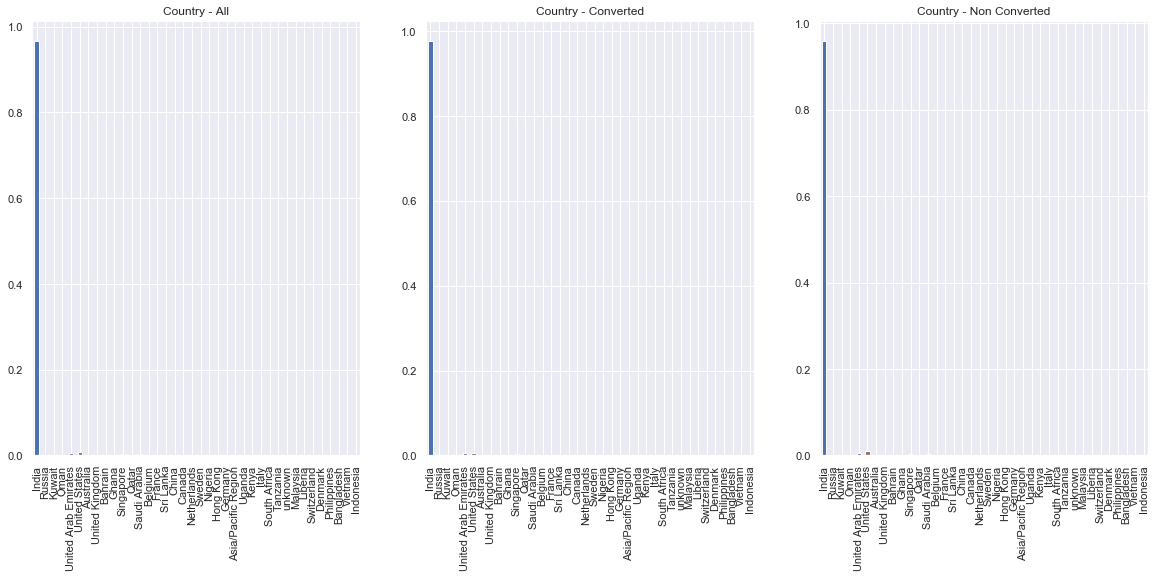

In [56]:
#Country. India is predominant here.

# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df1['Country'].value_counts().loc[order]/(df1['Country'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Country - All')

plt.subplot(1, 3, 2)
(df1[df1.Converted==1]['Country'].value_counts().loc[order]/(df1[df1.Converted==1]['Country'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Country - Converted')

plt.subplot(1, 3, 3)
(df1[df1.Converted==0]['Country'].value_counts().loc[order]/(df1[df1.Converted==0]['Country'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Country - Non Converted')


Text(0.5, 1.0, 'City - not Converted')

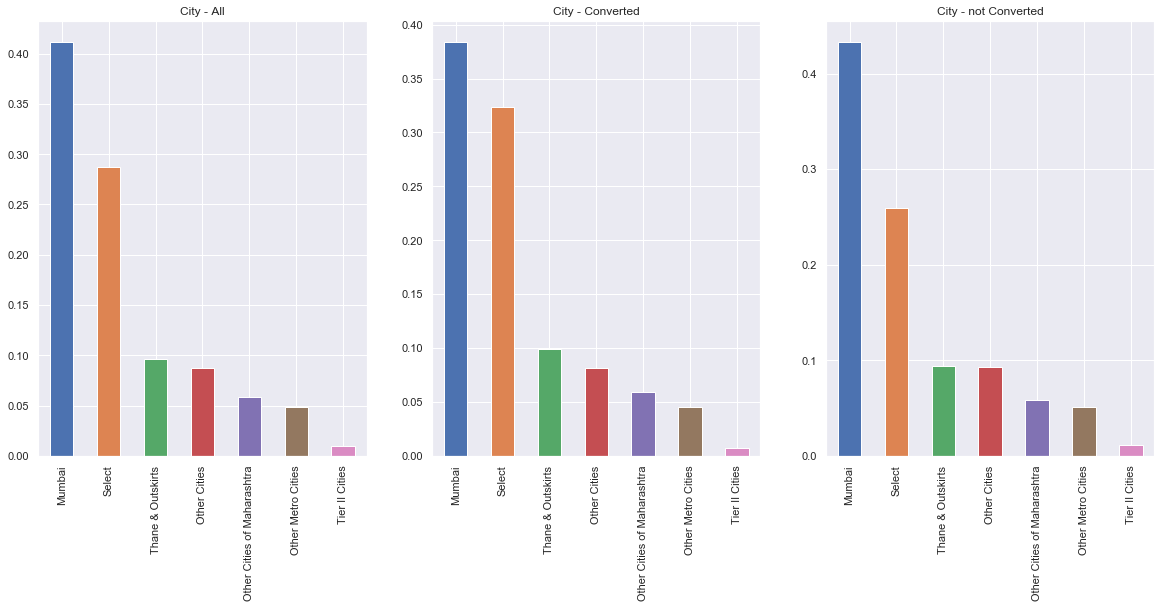

In [57]:
#City. Mumbai is predominant here but no major impact on conversion from bar plot

# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df1['City'].value_counts()/(df1['City'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('City - All')

plt.subplot(1, 3, 2)
(df1[df1.Converted==1]['City'].value_counts()/(df1[df1.Converted==1]['City'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('City - Converted')

plt.subplot(1, 3, 3)
(df1[df1.Converted==0]['City'].value_counts()/(df1[df1.Converted==0]['City'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('City - not Converted')


In [58]:
#Perhaps we can create derived feature - Overseas (1 for Non-indian and 0 for Indian) as most of the students are from India.

In [59]:
round(df1.isnull().sum()/len(df1.index)*100,2) 
# Check null %

Lead Origin                               0.00
Lead Source                               0.43
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.62
Total Time Spent on Website               0.00
Page Views Per Visit                      1.62
Last Activity                             1.23
Country                                   0.65
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      6.93
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [60]:
#Dropping City as no impact seen from bar plot/ EDA
df1=df1.drop('City',1)

In [61]:
df1['Overseas']=np.where(df1.Country!='India',1,0)
df1.info()

#Overseas is deriverd metric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 9239
Data columns (total 19 columns):
Lead Origin                               8402 non-null object
Lead Source                               8366 non-null object
Do Not Email                              8402 non-null object
Do Not Call                               8402 non-null object
Converted                                 8402 non-null int64
TotalVisits                               8266 non-null float64
Total Time Spent on Website               8402 non-null int64
Page Views Per Visit                      8266 non-null float64
Last Activity                             8299 non-null object
Country                                   8347 non-null object
Search                                    8402 non-null object
Newspaper Article                         8402 non-null object
X Education Forums                        8402 non-null object
Newspaper                                 8402 non-null object
Digital Adv

In [62]:
df1['Overseas'].value_counts()

0    8060
1     342
Name: Overseas, dtype: int64

Text(0.5, 1.0, 'Overseas - All')

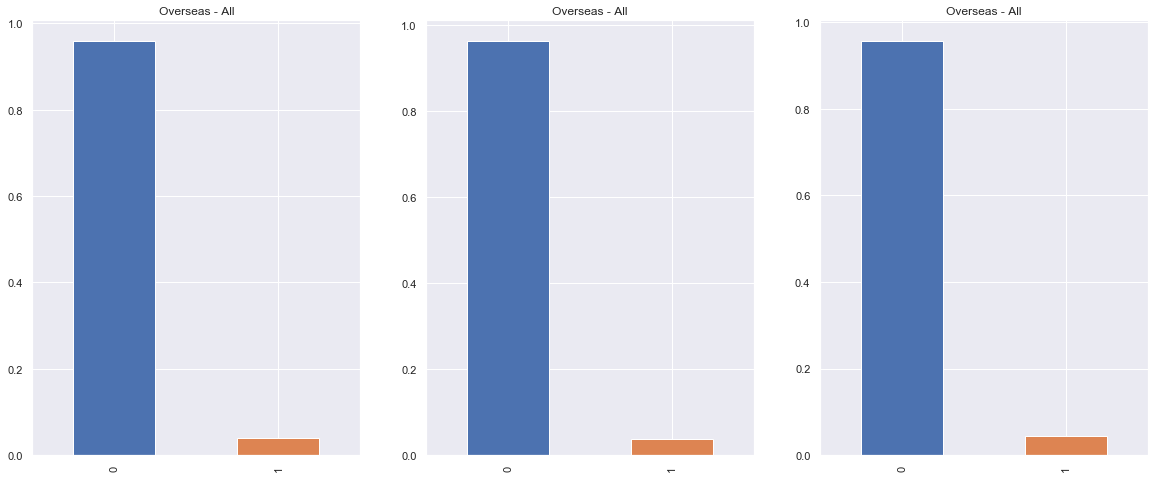

In [63]:
#Overseas. Overseas student in minority and less likely to convert 

# figure size
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
(df1['Overseas'].value_counts()/(df1['Overseas'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Overseas - All')
df1[df1.Converted==0]
plt.subplot(1, 3, 2)
(df1[df1.Converted==1]['Overseas'].value_counts()/(df1[df1.Converted==1]['Overseas'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Overseas - All')

plt.subplot(1, 3, 3)
(df1[df1.Converted==0]['Overseas'].value_counts()/(df1[df1.Converted==0]['Overseas'].value_counts().sum())).plot(kind='bar', rot = 90).set_title('Overseas - All')


In [64]:
#Still many Null. Removing COuntry and City. Cna come back and experiment with Devired feature - Overseas later
df2=df1
df2=df1.drop(['Country'],1)

In [65]:
df1.shape   #Lost 9240-8402= 800 rows of data

(8402, 19)

In [66]:
round(df1.Converted.value_counts()/df1.Converted.value_counts().sum()*100,2)

0    58.38
1    41.62
Name: Converted, dtype: float64

## Null Treatment finished
Approx 1000 rows of data lost 
The conversion ratio changed to approx 41% from 37%. We can say modified Dataset is representative of origninal data

# EDA

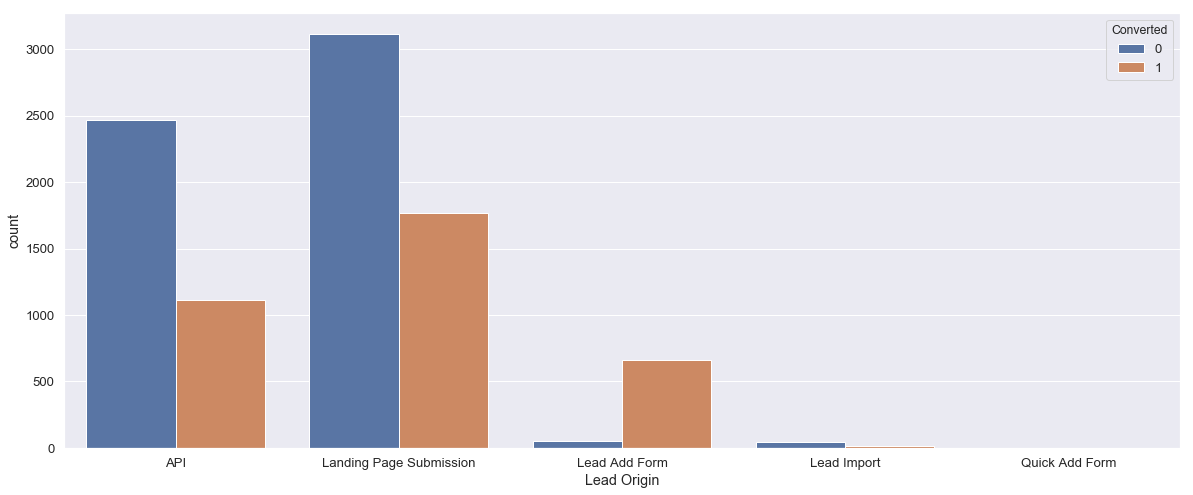

In [275]:
# figure size
plt.figure(figsize=(20,8))
sns.set(font_scale=1.2)
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)


In [ ]:
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form

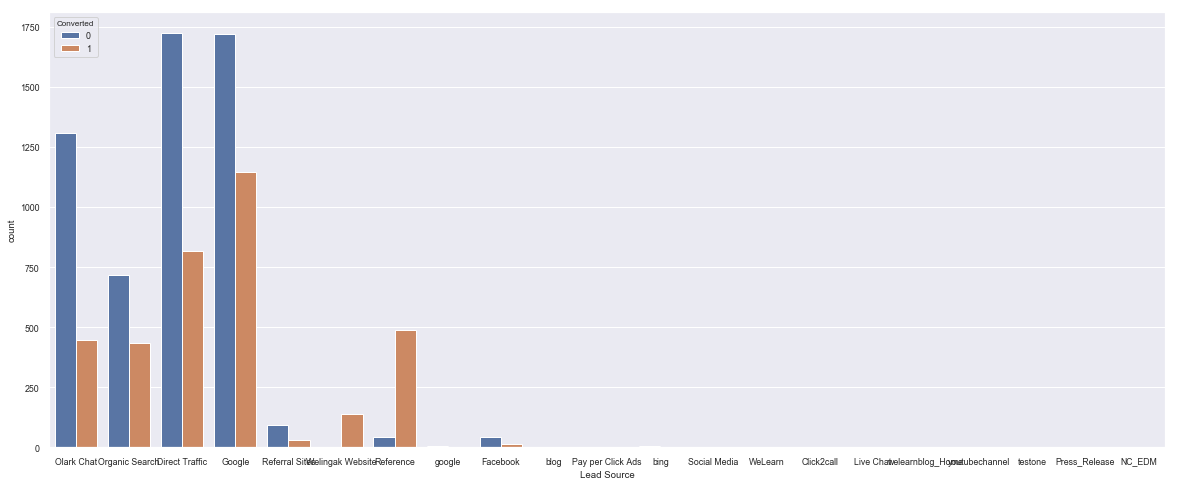

In [285]:
plt.figure(figsize=(20,8))
sns.set(font_scale=0.8)
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)


Google and Direct traffic generates maximum number of leads.

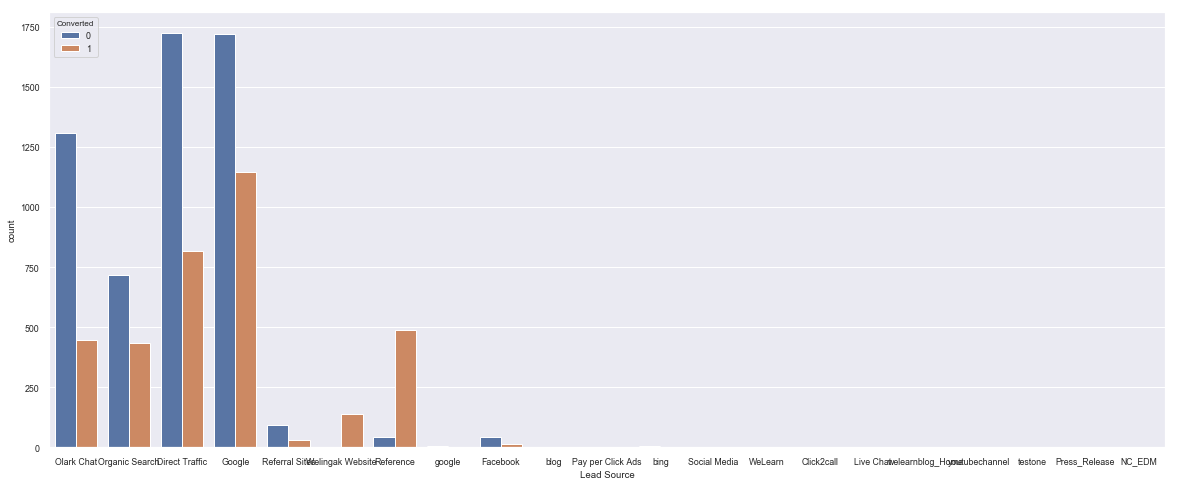

In [277]:
# figure size
plt.figure(figsize=(20,8))
sns.set(font_scale=0.8)
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)


Google and Direct traffic generates maximum number of leads.
Conversion Rate of reference leads and leads through welingak website is high.

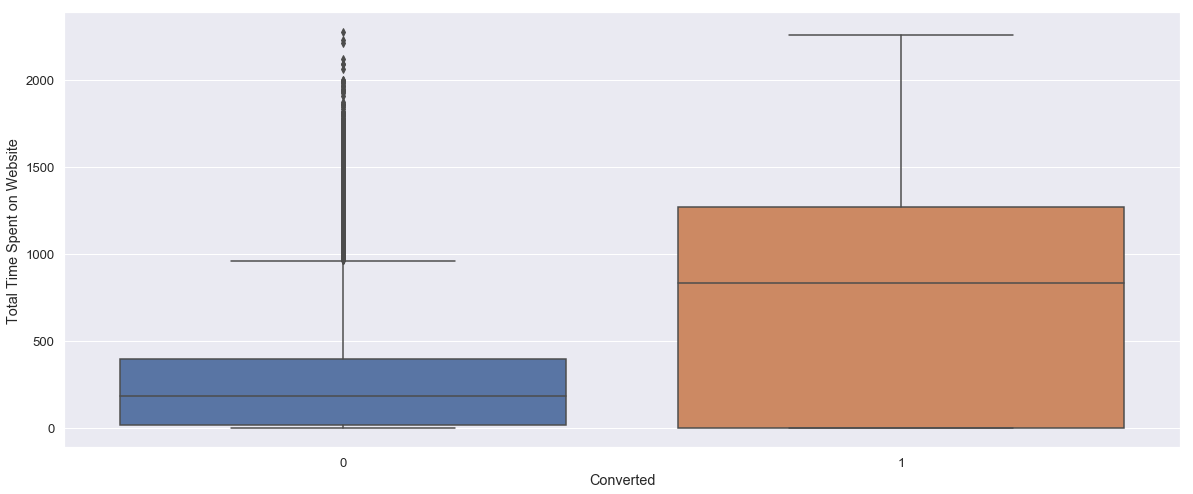

In [280]:

plt.figure(figsize=(20,8))
sns.set(font_scale=1.2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)

Leads spending more time on the weblise are more likely to be converted.

### Prep Data for Model

In [67]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Overseas
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,Modified,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes,Email Opened,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,Modified,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,Modified,0


In [68]:
df2.shape

(8402, 18)

EDA on variables having 2 unique values

In [69]:
#Replace Yes and No to 1 and 0 - works for whole data frame 
#https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
df2 = df2.replace(to_replace = "Yes", value = 1)
df2 = df2.replace(to_replace = "No", value = 0)

In [70]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Overseas
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,Modified,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified,0


In [71]:
two_unique_col=['Converted','Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

In [72]:
df2[two_unique_col].head()

,Converted,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


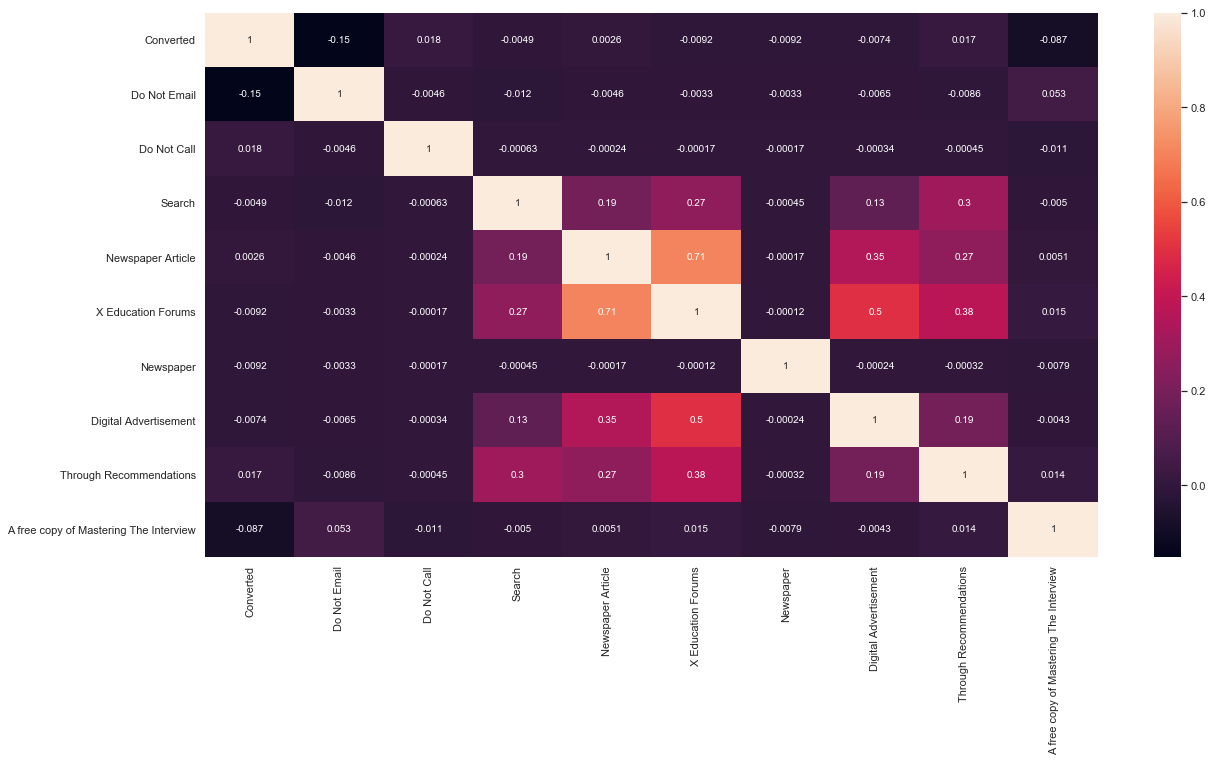

In [73]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df2[two_unique_col].corr(),annot = True)

In [74]:
df2[two_unique_col].apply(pd.value_counts)   #Can see some columsn have rarely flagged like Newspaper is flagged once they are as good as having one unique value

,Converted,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,4905,7716,8400,8388,8400,8401,8401,8398,8395,5514
1,3497,686,2,14,2,1,1,4,7,2888


In [75]:
#Dropping columns with only 1 to 14 number No or Yes - very low variance. their correlattion with converted is also low
df2=df2.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'],1)

In [76]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,Overseas
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,0


#CHeck nulls

In [77]:
df2.shape

(8402, 11)

In [78]:
round(df2.isnull().sum()/9240*100,2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.47
Total Time Spent on Website               0.00
Page Views Per Visit                      1.47
Last Activity                             1.11
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
Overseas                                  0.00
dtype: float64

In [79]:
df2=df2.dropna()   #Remove Null rows


### Dummy Variable Creation
Lead Origin, Lead Source, Last Activity, Last Notable Activity

In [80]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
Origin = pd.get_dummies(df2['Lead Origin'],prefix='Lead_Origin',drop_first=True)
#Adding the results to the master dataframe
df2 = pd.concat([df2,Origin],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
Source = pd.get_dummies(df2['Lead Source'],prefix='Lead_Source',drop_first=True)
#Adding the results to the master dataframe
df2 = pd.concat([df2,Source],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
LA = pd.get_dummies(df2['Last Activity'],prefix='LA',drop_first=True)
#Adding the results to the master dataframe
df2 = pd.concat([df2,LA],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
LNA = pd.get_dummies(df2['Last Notable Activity'],prefix='LNA',drop_first=True)
#Adding the results to the master dataframe
#df2 = pd.concat([df2,LNA],axis=1)


In [81]:
activity=pd.concat([LA,LNA],axis=1)

In [82]:
activity.shape

(8237, 29)

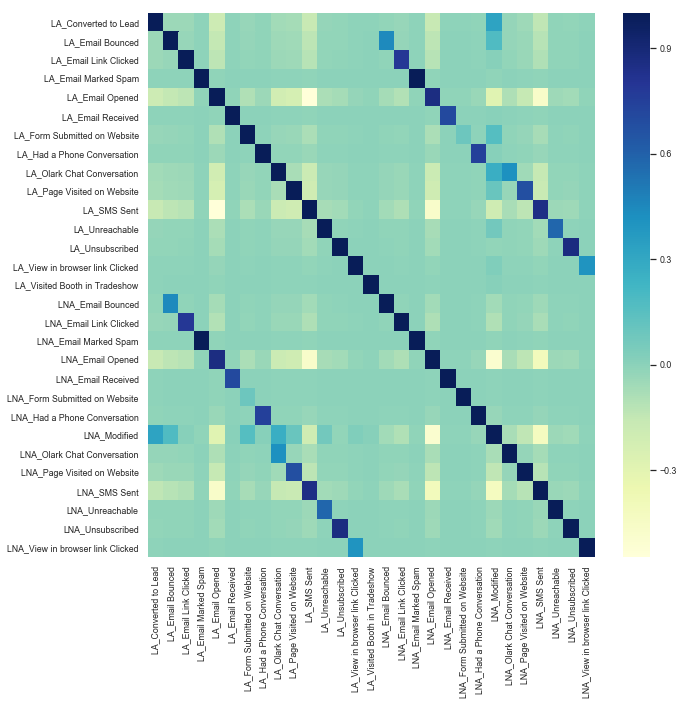

In [83]:
# Let's see the correlation matrix. Last Actvity and Last notable activuy are highly correlated.
#Will not merge LNA dummy to df2
plt.figure(figsize = (10,10))        # Size of the figure
sns.set(font_scale=0.8)
sns.heatmap(activity.corr(), cmap="YlGnBu")

### Dropping the repeated variables

In [84]:
# We have created dummies for the below variables, so we can drop them
df2 = df2.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'], 1)

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8237 entries, 0 to 9239
Data columns (total 45 columns):
Do Not Email                              8237 non-null int64
Converted                                 8237 non-null int64
TotalVisits                               8237 non-null float64
Total Time Spent on Website               8237 non-null int64
Page Views Per Visit                      8237 non-null float64
A free copy of Mastering The Interview    8237 non-null int64
Overseas                                  8237 non-null int64
Lead_Origin_Landing Page Submission       8237 non-null uint8
Lead_Origin_Lead Add Form                 8237 non-null uint8
Lead_Origin_Lead Import                   8237 non-null uint8
Lead_Source_Direct Traffic                8237 non-null uint8
Lead_Source_Facebook                      8237 non-null uint8
Lead_Source_Google                        8237 non-null uint8
Lead_Source_Live Chat                     8237 non-null uint8
Lead_Source_NC_EDM   

Now we can see we have all variables as integer. Lead_Source_Google and Lead_Source_google

In [86]:
df2['Lead_Source_Google']=df2['Lead_Source_Google']+df2['Lead_Source_google']

In [87]:
df2=df2.drop('Lead_Source_google',1)

In [88]:
df2.shape

(8237, 44)

### Checking for Outliers

In [89]:
# Checking for outliers in the continuous variables
num_lead = df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [90]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8237.000000,8237.000000,8237.000000
mean,3.798592,530.153940,2.606294
std,4.968146,548.947843,2.128467
min,0.000000,0.000000,0.000000
25%,2.000000,69.000000,1.330000
50%,3.000000,295.000000,2.000000
75%,5.000000,995.000000,4.000000
90%,8.000000,1400.000000,5.000000
95%,10.000000,1576.000000,6.000000
99%,17.640000,1845.640000,9.000000


(8154, 44)

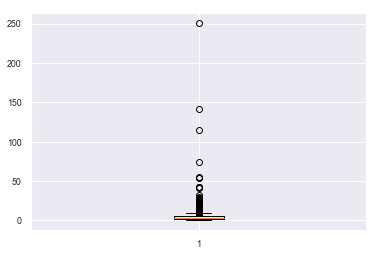

In [91]:
## Let's remove outliers

plt.boxplot(df2.TotalVisits)
high_quar = df2.TotalVisits.quantile(0.99)

df2 = df2[df2.TotalVisits<= high_quar]
df2.shape  #9074-8991  outlier rows/leads removed

(8147, 44)

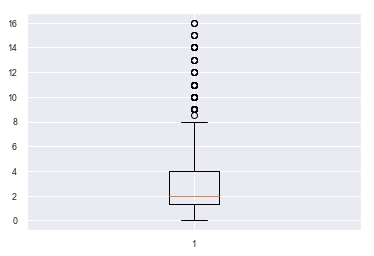

In [92]:
## Let's remove outliers

plt.boxplot(df2['Page Views Per Visit'])
high_quar = df2.TotalVisits.quantile(0.99)

df2 = df2[df2['Page Views Per Visit']<= high_quar]
df2.shape  #7 outlier rows/leads removed

### Feature Standardisation

In [93]:
df2.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Overseas,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,...,LA_Email Received,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,LA_View in browser link Clicked,LA_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# Normalising continuous features
norm = df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [95]:
normalized_df=(norm-norm.mean())/norm.std()
df3 = df2.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)
df3 = pd.concat([df3,normalized_df],axis=1)
df3.head()

,Do Not Email,Converted,A free copy of Mastering The Interview,Overseas,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,...,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,LA_View in browser link Clicked,LA_Visited Booth in Tradeshow,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,-1.204792,-0.963591,-1.294374
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.502479,0.264743,-0.034995
2,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,-0.521884,1.828409,-0.286871
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,-0.863338,-0.407743,-0.790623
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,-0.521884,1.638874,-0.790623


### Checking the Conversion Rate

In [96]:
converted = (sum(df3['Converted'])/len(df3['Converted'].index))*100
converted

40.923039155517365

We have almost 37% lead conversion rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [97]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df3.drop('Converted',axis=1)

# Putting response variable to y
y = df3['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [99]:
X_train.shape

(5702, 43)

In [100]:
y_train.shape

(5702,)

### Running Your First Training Model

In [101]:
import statsmodels.api as sm

In [102]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5660
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        21:54:37   Pearson chi2:                 1.02e+19
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   2.735e+14   6.54e+07   4.18e+06      0.000    2.74e+14    2.74e+14
Do Not Email                            2.439e+14   4.73e+06   5.16e+07      0.000    2.44e+14    2.44e+14
A free copy of Mastering The Interview -1.415e+14   2.64e+06  -5.35e+07      0.000   -1.42e+14   -1.42e+14
Overseas                               -7.486e+13   4.49e+06  -1.67e+07      0.000   -7.49e+13   -7.49e+13
Lead_Origin_Landing Page Submission      -1.3e+14   2.69e+06  -4.83e+07      0.000    -1.3e+14    -1.3e+14
Lead_Origin_Lead Add Form               4.997e+15   4.75e+07   1.05e+08      0.000       5e+15       5e+15
Lead_Origin_Lead Import                 2.247e+15   6.94e+07   3.24e+07      0.000    2.25e+15    2.25e+15
Lead_Source_Direct Traffic              3.108e+15   5.82e+07   5.34e+07      0.000    3.11e+15    3.11e+15
Lead_Source_Facebook                    8.807e+12    8.9e+07    9.9e+04      0.000    8.81e+12    8.81e+12
Lead_Source_Google                      3.253e+15   5.82e+07   5.59e+07      0.000    3.25e+15    3.25e+15
Lead_Source_Live Chat                   4.368e+15   7.51e+07   5.82e+07      0.000    4.37e+15    4.37e+15
Lead_Source_NC_EDM                      6.639e+15   8.88e+07   7.47e+07      0.000    6.64e+15    6.64e+15
Lead_Source_Olark Chat                  5.016e+15   5.82e+07   8.62e+07      0.000    5.02e+15    5.02e+15
Lead_Source_Organic Search              3.094e+15   5.82e+07   5.31e+07      0.000    3.09e+15    3.09e+15
Lead_Source_Pay per Click Ads          -1.348e+15   8.88e+07  -1.52e+07      0.000   -1.35e+15   -1.35e+15
Lead_Source_Press_Release              -9.939e+14   8.91e+07  -1.12e+07      0.000   -9.94e+14   -9.94e+14
Lead_Source_Reference                  -3.724e+14   3.38e+07   -1.1e+07      0.000   -3.72e+14   -3.72e+14
Lead_Source_Referral Sites              3.251e+15   5.87e+07   5.54e+07      0.000    3.25e+15    3.25e+15
Lead_Source_Social Media                3.638e+15   7.52e+07   4.84e+07      0.000    3.64e+15    3.64e+15
Lead_Source_WeLearn                     6.026e+15   8.89e+07   6.78e+07      0.000    6.03e+15    6.03e+15
Lead_Source_Welingak Website            2.999e+14   3.45e+07    8.7e+06      0.000       3e+14       3e+14
Lead_Source_bing                        2.898e+15   6.43e+07   4.51e+07      0.000     2.9e+15     2.9e+15
Lead_Source_blog                       -2.184e+15   8.88e+07  -2.46e+07      0.000   -2.18e+15   -2.18e+15
Lead_Source_testone                      -13.4284   2.56e-07  -5.24e+07      0.000     -13.428     -13.428
Lead_Source_welearnblog_Home           -1.731e+15   8.88e+07  -1.95e+07      0.000   -1.73e+15   -1.73e+15
Lead_Source_youtubechannel             -1.527e+15   8.95e+07  -1.71e+07      0.000   -1.53e+15   -1.53e+15
LA_Converted to Lead                   -3.812e+15   3.03e+0

### Correlation Matrix

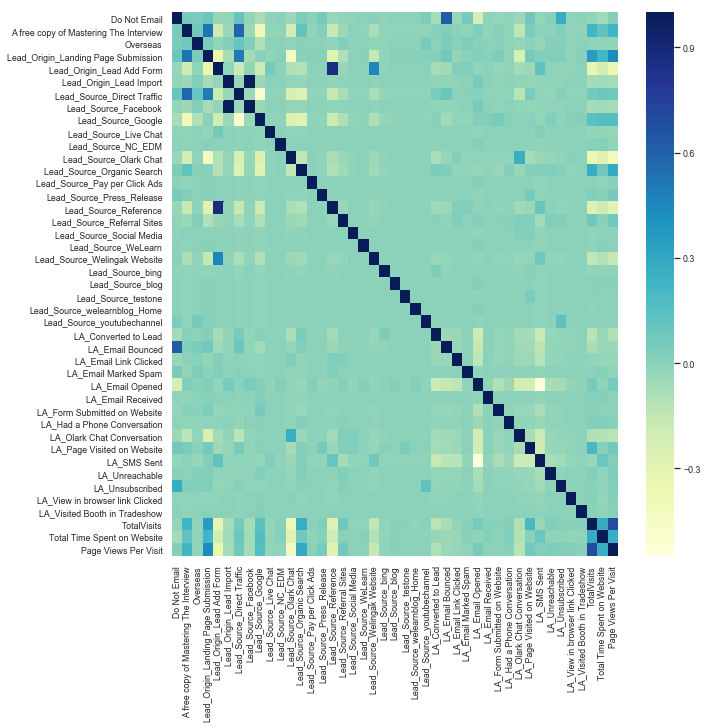

In [103]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,10))        # Size of the figure
sns.set(font_scale=0.8)
sns.heatmap(X.corr(), cmap="YlGnBu")

### Dropping highly correlated variables.
Lead_Source_Reference
Lead_Source_Direct_Traffic
Lead_Source_Facebook
LA_Email Bounced
LNA_Email Clicked
LNA_EMail Marked Spam
LNA_Email Opened
LNA_Email Received
LNA_Resubscribed to emails
LNA_SMS Sent
LNA_Unreachable
LNA_Unsubscribed
Page Views Per Visit
LNA_View in browser link Clicked

In [104]:
X.columns

Index(['Do Not Email', 'A free copy of Mastering The Interview', 'Overseas',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Direct Traffic',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Live Chat',
       'Lead_Source_NC_EDM', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Pay per Click Ads',
       'Lead_Source_Press_Release', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Lead_Source_Social Media',
       'Lead_Source_WeLearn', 'Lead_Source_Welingak Website',
       'Lead_Source_bing', 'Lead_Source_blog', 'Lead_Source_testone',
       'Lead_Source_welearnblog_Home', 'Lead_Source_youtubechannel',
       'LA_Converted to Lead', 'LA_Email Bounced', 'LA_Email Link Clicked',
       'LA_Email Marked Spam', 'LA_Email Opened', 'LA_Email Received',
       'LA_Form Submitted on Website', 'LA_Had a Phone Conversation',
       'LA_Olark Chat Conversation', 

In [105]:
Corr_col=['Lead_Source_Reference','Lead_Source_Direct Traffic','Lead_Source_Facebook','LA_Email Bounced','Page Views Per Visit']

In [106]:
X_test2 = X_test.drop(Corr_col,1)
X_train2 = X_train.drop(Corr_col,1)

In [107]:
X_train2.shape

(5702, 38)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

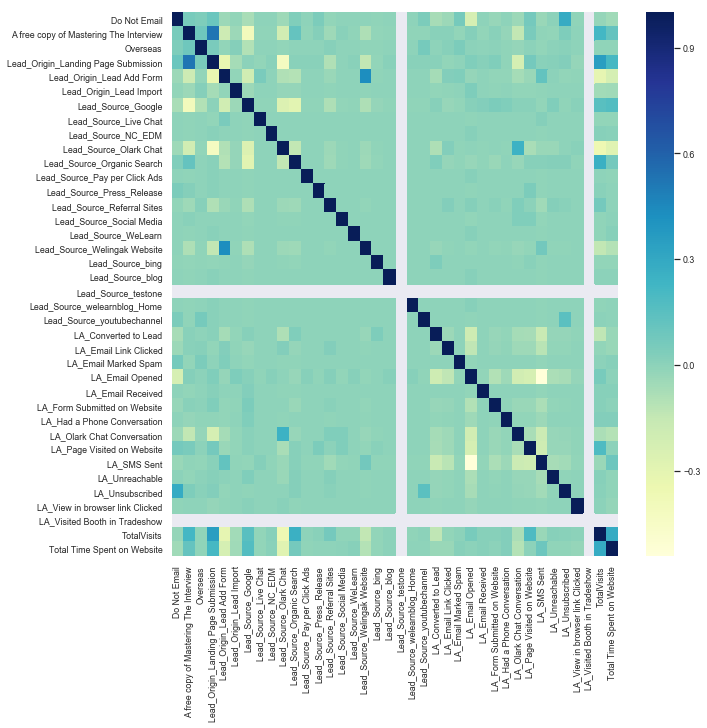

In [108]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train2.corr(),cmap="YlGnBu")

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [109]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5665
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.3
Date:                Mon, 10 Jun 2019   Deviance:                       5238.6
Time:                        21:54:41   Pearson chi2:                 5.88e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.2879      0.362     -3.558      0.000      -1.997      -0.578
Do Not Email                              -1.7678      0.218     -8.095      0.000      -2.196      -1.340
A free copy of Mastering The Interview    -0.0482      0.102     -0.473      0.636      -0.248       0.151
Overseas                                   0.0127      0.175      0.072      0.942      -0.331       0.356
Lead_Origin_Landing Page Submission       -0.1186      0.099     -1.192      0.233      -0.314       0.076
Lead_Origin_Lead Add Form                  4.5301      0.267     16.963      0.000       4.007       5.054
Lead_Origin_Lead Import                    1.4397      0.550      2.616      0.009       0.361       2.518
Lead_Source_Google                         0.1482      0.108      1.367      0.172      -0.064       0.361
Lead_Source_Live Chat                     19.1873   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead_Source_NC_EDM                        22.6228   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead_Source_Olark Chat                     1.9990      0.162     12.307      0.000       1.681       2.317
Lead_Source_Organic Search                -0.0188      0.122     -0.154      0.877      -0.259       0.221
Lead_Source_Pay per Click Ads            -20.5958   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Source_Press_Release                -18.6854   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Source_Referral Sites                 0.0654      0.315      0.208      0.835      -0.551       0.682
Lead_Source_Social Media                   2.2524      1.458      1.545      0.122      -0.605       5.110
Lead_Source_WeLearn                       22.4417   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead_Source_Welingak Website               1.1696      0.765      1.529      0.126      -0.329       2.669
Lead_Source_bing                           0.1269      1.183      0.107      0.915      -2.192       2.446
Lead_Source_blog                         -21.7897   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Source_testone                      1.14e-10   3.43e-07      0.000      1.000   -6.72e-07    6.73e-07
Lead_Source_welearnblog_Home             -21.0247   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Source_youtubechannel               -21.0412   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
LA_Converted to Lead                      -0.7904      0.391     -2.022      0.043      -1.557      -0.024
LA_Email Link Clicked                      0.0441      0.396      0.111      0.911      -0.733       0.821
LA_Email Marked Spam                      22.5757   3.39e+04      0.001      0.999   -6.64e+04    6.64e+04
LA_Email Opened                            0.2958      0.34

### Feature Selection Using RFE

In [146]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False False False  True False  True False False False False  True
  True False False  True  True False False  True False False False False
 False  True  True False False False  True False  True  True False  True
 False False False False False  True False]
[ 1 25 26 28  1 15  1 23  2 22 14  1  1 17 12  1  1  9 16  1 10  8 19 13
 18  1  1 11  5 27  1  3  1  1  7  1 29  4  6 24 20  1 21]


In [147]:
# Variables selected by RFE 
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Direct Traffic', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Lead_Source_Welingak Website',
       'LA_Converted to Lead', 'LA_Email Bounced', 'LA_Email Received',
       'LA_Had a Phone Conversation', 'LA_Olark Chat Conversation',
       'LA_SMS Sent', 'Total Time Spent on Website'],
      dtype='object')

In [148]:
drop_col = X_train.columns[~rfe.support_]  #Columns dropped
drop_col

Index(['A free copy of Mastering The Interview', 'Overseas',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Live Chat',
       'Lead_Source_NC_EDM', 'Lead_Source_Pay per Click Ads',
       'Lead_Source_Press_Release', 'Lead_Source_Social Media',
       'Lead_Source_WeLearn', 'Lead_Source_bing', 'Lead_Source_blog',
       'Lead_Source_testone', 'Lead_Source_welearnblog_Home',
       'Lead_Source_youtubechannel', 'LA_Email Link Clicked',
       'LA_Email Marked Spam', 'LA_Email Opened',
       'LA_Form Submitted on Website', 'LA_Page Visited on Website',
       'LA_Unreachable', 'LA_Unsubscribed', 'LA_View in browser link Clicked',
       'LA_Visited Booth in Tradeshow', 'TotalVisits', 'Page Views Per Visit'],
      dtype='object')

In [149]:
X_train3=X_train[col]

In [150]:
# Let's run the model using the selected variables
logm3 = sm.GLM(y_train,(sm.add_constant(X_train3)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5686
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.7
Date:                Mon, 10 Jun 2019   Deviance:                       5307.4
Time:                        22:01:18   Pearson chi2:                 5.93e+03
No. Iterations:                    19   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9617      0.064    -15.079      0.000      -1.087      -0.837
Do Not Email                    -1.4662      0.191     -7.688      0.000      -1.840      -1.092
Lead_Origin_Lead Add Form        3.0395      1.143      2.658      0.008       0.798       5.281
Lead_Source_Direct Traffic      -0.2448      0.083     -2.948      0.003      -0.408      -0.082
Lead_Source_Olark Chat           1.6903      0.119     14.223      0.000       1.457       1.923
Lead_Source_Organic Search      -0.0763      0.107     -0.713      0.476      -0.286       0.133
Lead_Source_Reference            1.1893      1.165      1.021      0.307      -1.094       3.473
Lead_Source_Referral Sites       0.0451      0.302      0.150      0.881      -0.546       0.637
Lead_Source_Welingak Website     2.3262      1.357      1.715      0.086      -0.333       4.985
LA_Converted to Lead            -1.1418      0.197     -5.793      0.000      -1.528      -0.755
LA_Email Bounced                -0.8418      0.377     -2.235      0.025      -1.580      -0.104
LA_Email Received               20.6058   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
LA_Had a Phone Conversation      2.1496      0.655      3.282      0.001       0.866       3.433
LA_Olark Chat Conversation      -1.4273      0.175     -8.167      0.000      -1.770      -1.085
LA_SMS Sent                      1.2099      0.074     16.246      0.000       1.064       1.356
Total Time Spent on Website      1.1221      0.039     28.595      0.000       1.045       1.199
================================================================================================
"""

In [151]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#Multicolinear features

,Features,VIF
1,Lead_Origin_Lead Add Form,56.87
5,Lead_Source_Reference,45.69
7,Lead_Source_Welingak Website,12.33
0,Do Not Email,1.83
9,LA_Email Bounced,1.77
13,LA_SMS Sent,1.38
3,Lead_Source_Olark Chat,1.26
2,Lead_Source_Direct Traffic,1.24
14,Total Time Spent on Website,1.19
12,LA_Olark Chat Conversation,1.13


In [153]:
col=col.drop('Lead_Origin_Lead Add Form',1) #Drop insignificant feature


In [154]:
X_train4=X_train[col]

In [155]:
# Let's re- run the model using the selected variables
logm4 = sm.GLM(y_train,(sm.add_constant(X_train4)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5687
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.6
Date:                Mon, 10 Jun 2019   Deviance:                       5317.2
Time:                        22:01:53   Pearson chi2:                 5.93e+03
No. Iterations:                    19   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9486      0.064    -14.934      0.000      -1.073      -0.824
Do Not Email                    -1.4673      0.191     -7.700      0.000      -1.841      -1.094
Lead_Source_Direct Traffic      -0.2547      0.083     -3.072      0.002      -0.417      -0.092
Lead_Source_Olark Chat           1.6761      0.119     14.135      0.000       1.444       1.908
Lead_Source_Organic Search      -0.0860      0.107     -0.806      0.420      -0.295       0.123
Lead_Source_Reference            4.2135      0.246     17.110      0.000       3.731       4.696
Lead_Source_Referral Sites       0.0336      0.302      0.111      0.911      -0.557       0.625
Lead_Source_Welingak Website     5.3511      0.737      7.260      0.000       3.907       6.796
LA_Converted to Lead            -1.1472      0.197     -5.824      0.000      -1.533      -0.761
LA_Email Bounced                -0.8440      0.376     -2.242      0.025      -1.582      -0.106
LA_Email Received               20.5955   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
LA_Had a Phone Conversation      2.1393      0.655      3.268      0.001       0.856       3.422
LA_Olark Chat Conversation      -1.4317      0.175     -8.196      0.000      -1.774      -1.089
LA_SMS Sent                      1.2057      0.074     16.209      0.000       1.060       1.351
Total Time Spent on Website      1.1182      0.039     28.558      0.000       1.041       1.195
================================================================================================
"""

In [137]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#VIF Looks good now

,Features,VIF
1,Lead_Origin_Lead Add Form,56.87
5,Lead_Source_Reference,45.69
7,Lead_Source_Welingak Website,12.33
0,Do Not Email,1.83
9,LA_Email Bounced,1.77
12,LA_SMS Sent,1.38
3,Lead_Source_Olark Chat,1.26
2,Lead_Source_Direct Traffic,1.24
13,Total Time Spent on Website,1.19
11,LA_Olark Chat Conversation,1.13


In [156]:
col=col.drop('LA_Email Received',1) #Drop insignificant feature


In [157]:
X_train5=X_train[col]

In [158]:
# Let's re- run the model using the selected variables
X_train_sm = sm.add_constant(X_train5)
logm5 = sm.GLM(y_train,(sm.add_constant(X_train5)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5688
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.0
Date:                Mon, 10 Jun 2019   Deviance:                       5320.0
Time:                        22:02:17   Pearson chi2:                 5.93e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9450      0.063    -14.895      0.000      -1.069      -0.821
Do Not Email                    -1.4678      0.191     -7.703      0.000      -1.841      -1.094
Lead_Source_Direct Traffic      -0.2576      0.083     -3.108      0.002      -0.420      -0.095
Lead_Source_Olark Chat           1.6739      0.119     14.120      0.000       1.442       1.906
Lead_Source_Organic Search      -0.0888      0.107     -0.832      0.405      -0.298       0.120
Lead_Source_Reference            4.2112      0.246     17.102      0.000       3.729       4.694
Lead_Source_Referral Sites       0.0304      0.302      0.101      0.920      -0.561       0.621
Lead_Source_Welingak Website     5.3492      0.737      7.257      0.000       3.905       6.794
LA_Converted to Lead            -1.1493      0.197     -5.834      0.000      -1.535      -0.763
LA_Email Bounced                -0.8454      0.376     -2.246      0.025      -1.583      -0.108
LA_Had a Phone Conversation      2.1368      0.655      3.264      0.001       0.854       3.420
LA_Olark Chat Conversation      -1.4336      0.175     -8.206      0.000      -1.776      -1.091
LA_SMS Sent                      1.2039      0.074     16.187      0.000       1.058       1.350
Total Time Spent on Website      1.1188      0.039     28.573      0.000       1.042       1.196
================================================================================================
"""

In [159]:
col=col.drop('Lead_Source_Referral Sites',1) #Drop insignificant feature


In [160]:
X_train6=X_train[col]

In [161]:
# Let's re- run the model using the selected variables
X_train_sm = sm.add_constant(X_train6)
logm6 = sm.GLM(y_train,(sm.add_constant(X_train6)), family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5689
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.0
Date:                Mon, 10 Jun 2019   Deviance:                       5320.0
Time:                        22:02:42   Pearson chi2:                 5.93e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9439      0.062    -15.129      0.000      -1.066      -0.822
Do Not Email                    -1.4677      0.191     -7.703      0.000      -1.841      -1.094
Lead_Source_Direct Traffic      -0.2586      0.082     -3.142      0.002      -0.420      -0.097
Lead_Source_Olark Chat           1.6727      0.118     14.183      0.000       1.442       1.904
Lead_Source_Organic Search      -0.0898      0.106     -0.845      0.398      -0.298       0.119
Lead_Source_Reference            4.2100      0.246     17.117      0.000       3.728       4.692
Lead_Source_Welingak Website     5.3480      0.737      7.257      0.000       3.904       6.792
LA_Converted to Lead            -1.1494      0.197     -5.835      0.000      -1.535      -0.763
LA_Email Bounced                -0.8456      0.376     -2.246      0.025      -1.583      -0.108
LA_Had a Phone Conversation      2.1360      0.655      3.263      0.001       0.853       3.419
LA_Olark Chat Conversation      -1.4333      0.175     -8.206      0.000      -1.776      -1.091
LA_SMS Sent                      1.2035      0.074     16.205      0.000       1.058       1.349
Total Time Spent on Website      1.1187      0.039     28.586      0.000       1.042       1.195
================================================================================================
"""

In [162]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#Both Model and VIF Looks good now

,Features,VIF
0,Do Not Email,1.83
7,LA_Email Bounced,1.77
10,LA_SMS Sent,1.38
2,Lead_Source_Olark Chat,1.26
1,Lead_Source_Direct Traffic,1.24
11,Total Time Spent on Website,1.19
9,LA_Olark Chat Conversation,1.13
3,Lead_Source_Organic Search,1.12
4,Lead_Source_Reference,1.12
6,LA_Converted to Lead,1.06


In [163]:
col=col.drop('Lead_Source_Organic Search',1) #Drop insignificant feature

In [164]:
X_train7=X_train[col]

In [165]:
# Let's re- run the model using the selected variables
X_train_sm = sm.add_constant(X_train7)
logm7 = sm.GLM(y_train,(sm.add_constant(X_train7)), family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5690
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.4
Date:                Mon, 10 Jun 2019   Deviance:                       5320.8
Time:                        22:04:01   Pearson chi2:                 5.92e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9658      0.057    -16.998      0.000      -1.077      -0.854
Do Not Email                    -1.4711      0.190     -7.722      0.000      -1.844      -1.098
Lead_Source_Direct Traffic      -0.2353      0.078     -3.033      0.002      -0.387      -0.083
Lead_Source_Olark Chat           1.6956      0.115     14.763      0.000       1.470       1.921
Lead_Source_Reference            4.2332      0.244     17.316      0.000       3.754       4.712
Lead_Source_Welingak Website     5.3724      0.737      7.294      0.000       3.929       6.816
LA_Converted to Lead            -1.1534      0.197     -5.859      0.000      -1.539      -0.768
LA_Email Bounced                -0.8513      0.376     -2.262      0.024      -1.589      -0.114
LA_Had a Phone Conversation      2.1434      0.655      3.270      0.001       0.859       3.428
LA_Olark Chat Conversation      -1.4328      0.175     -8.200      0.000      -1.775      -1.090
LA_SMS Sent                      1.2009      0.074     16.189      0.000       1.055       1.346
Total Time Spent on Website      1.1189      0.039     28.595      0.000       1.042       1.196
================================================================================================
"""

In [167]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#VIF and model Looks good now

,Features,VIF
0,Do Not Email,1.82
6,LA_Email Bounced,1.76
9,LA_SMS Sent,1.29
2,Lead_Source_Olark Chat,1.25
1,Lead_Source_Direct Traffic,1.22
10,Total Time Spent on Website,1.18
3,Lead_Source_Reference,1.12
8,LA_Olark Chat Conversation,1.12
4,Lead_Source_Welingak Website,1.04
5,LA_Converted to Lead,1.04


In [168]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred.head()

,0
8843,0.933499
2119,0.511522
8307,0.098318
4867,0.725301
3927,0.347772


In [169]:
y_train_pred = y_train_pred.values.reshape(-1)  #needed for next step

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [170]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred, 'Score':y_train_pred*100})
y_train_pred_final.head(10)

,Converted,Converted_Prob,Score
0,0,0.933499,93.349878
1,1,0.511522,51.152200
2,0,0.098318,9.831840
3,1,0.725301,72.530138
4,0,0.347772,34.777206
5,1,0.746479,74.647907
6,1,0.751815,75.181468
7,1,0.093500,9.350046
8,0,0.701089,70.108943
9,0,0.588044,58.804401


In [171]:
y_train_pred_final['Score']=round(y_train_pred_final['Score'],1)
y_train_pred_final.head(1)

,Converted,Converted_Prob,Score
0,0,0.933499,93.3


In [172]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Score,predicted
0,0,0.933499,93.3,1
1,1,0.511522,51.2,1
2,0,0.098318,9.8,0
3,1,0.725301,72.5,1
4,0,0.347772,34.8,0


In [173]:
from sklearn import metrics

In [175]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

#Approx 78% accuracy

0.781830936513504


In [176]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2866,  469],
       [ 775, 1592]], dtype=int64)

In [177]:
# Actual/Predicted       not_Convert   Convert
        # not_Convert    2866          469
        # Convert        775          1592  

### Metrics beyond simply accuracy

In [178]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.672581326573722

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.8593703148425788

In [181]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.1406296851574213


In [182]:
#Measure Conversion Rate. We need to optimize this
((TP+FN)/(TP+FP))

#MOre number of actual conversions than predicted. Hence some of the hot leads were missed

1.148471615720524

# Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test

In [183]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [184]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

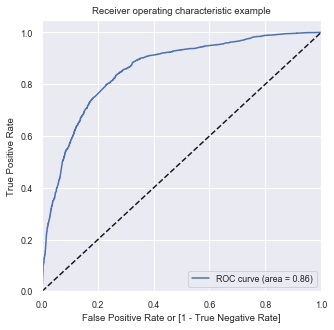

In [185]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 10: Finding Optimal Cutoff Point for '80% lead conversion rate'

 Lead Conversion Rate, LCR= Actual number converted/ Number of leads 'predicted' converted
Lead Conversion Rate = (TP+FN)/(TP+FP)

Without any model or threshold of zero the LCR is 37% 

In [186]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.933499,93.3,1,1,1,1,1,1,1,1,1,1,1
1,1,0.511522,51.2,1,1,1,1,1,1,1,0,0,0,0
2,0,0.098318,9.8,0,1,0,0,0,0,0,0,0,0,0
3,1,0.725301,72.5,1,1,1,1,1,1,1,1,1,0,0
4,0,0.347772,34.8,0,1,1,1,1,0,0,0,0,0,0


In [260]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Score','accuracy','sensi','speci', 'LCR'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    LCR= (cm1[1,1]+cm1[1,0])/(cm1[1,1] + cm1[0,1])
    cutoff_df.loc[i] =[ i*100 ,accuracy,sensi,speci, LCR]
print(cutoff_df)

     Score  accuracy     sensi     speci       LCR
0.0    0.0  0.415118  1.000000  0.000000  0.415118
0.1   10.0  0.534023  0.985636  0.213493  0.477603
0.2   20.0  0.718871  0.917195  0.578111  0.661543
0.3   30.0  0.761487  0.880439  0.677061  0.748814
0.4   40.0  0.778850  0.803549  0.761319  0.877317
0.5   50.0  0.781831  0.672581  0.859370  1.148472
0.6   60.0  0.768678  0.594846  0.892054  1.338801
0.7   70.0  0.749912  0.499789  0.927436  1.661053
0.8   80.0  0.703437  0.337136  0.963418  2.572826
0.9   90.0  0.643809  0.158428  0.988306  5.717391


<Figure size 576x576 with 0 Axes>

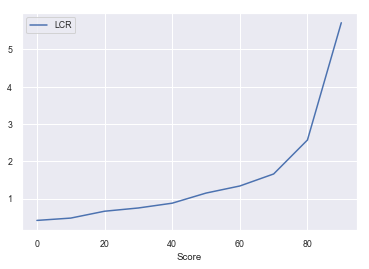

In [267]:
# Let's plot LCR vs prob. Attain 80% conversion rate at around 0.35 prob. Score -35 threshold which CEO wasnts
plt.figure(figsize = (8,8))
cutoff_df.plot.line(x='Score', y=['LCR'])
plt.show()

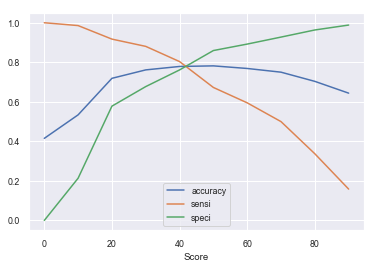

In [263]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Score', y=['accuracy','sensi','speci'])
plt.show()

In [190]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.933499,93.3,1,1,1,1,1,1,1,1,1,1,1
1,1,0.511522,51.2,1,1,1,1,1,1,1,0,0,0,0
2,0,0.098318,9.8,0,1,0,0,0,0,0,0,0,0,0
3,1,0.725301,72.5,1,1,1,1,1,1,1,1,1,0,0
4,0,0.347772,34.8,0,1,1,1,1,0,0,0,0,0,0


In [191]:
y_train_pred_final.shape

(5702, 14)

In [192]:
y_train_pred_final.Converted.sum()

2367

In [193]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7730620834794809


In [194]:
confusion2 =metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[2407,  928],
       [ 366, 2001]], dtype=int64)

In [195]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [196]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8453738910012675

In [197]:
# Let us calculate specificity
TN / float(TN+FP)

0.7217391304347827

In [198]:
LCR=((TP+FN)/(TP+FP))
LCR   #80% Conversion ratio

0.8081256401502219

In [220]:
#Precision
TP/(TP+FP)

0.6831683168316832

In [221]:
#Recall
TP/(TP+FN)

0.8453738910012675

In [224]:
from sklearn.metrics import precision_score, recall_score

In [225]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6831683168316832

# Step 11: Making predictions on the test set

In [199]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead_Source_Direct Traffic,Lead_Source_Olark Chat,Lead_Source_Reference,Lead_Source_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_SMS Sent,Total Time Spent on Website
3802,0,0,0,0,0,1,0,0,0,0,-0.507978
355,0,0,0,0,0,0,0,0,0,0,-0.717560
5027,0,1,0,0,0,0,0,0,0,1,1.762801
7483,0,0,0,0,0,0,0,0,0,1,-0.615502
4662,0,0,0,0,1,0,0,0,0,0,0.578205


In [200]:
X_test_sm = sm.add_constant(X_test)

In [201]:
#Make prediction on test set
y_test_pred = res.predict(X_test_sm)

In [202]:
y_test_pred[:10]

3802    0.063709
355     0.145703
5027    0.877838
7483    0.388496
4662    0.993654
6826    0.396762
4424    0.701089
6527    0.010283
6253    0.101435
3388    0.926275
dtype: float64

In [203]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3802,0.063709
355,0.145703
5027,0.877838
7483,0.388496
4662,0.993654


In [204]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [205]:
# Putting CustID to index
y_test_df['ProspectID'] = y_test_df.index

In [206]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [207]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [208]:
y_pred_final.tail(10)

,Converted,ProspectID,0
2435,1,4453,0.894089
2436,1,7231,0.144155
2437,0,4110,0.413774
2438,1,4091,0.687910
2439,0,8724,0.487529
2440,1,1055,0.812941
2441,1,4801,0.331139
2442,0,7926,0.037798
2443,1,2196,0.731537
2444,0,5242,0.181280


In [209]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [210]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProspectID','Converted','Converted_Prob'], axis=1)

In [211]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,Converted,Converted_Prob
0,3802,0,0.063709
1,355,0,0.145703
2,5027,1,0.877838
3,7483,0,0.388496
4,4662,1,0.993654


In [234]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [235]:
y_pred_final.tail()

,ProspectID,Converted,Converted_Prob,final_predicted
2440,1055,1,0.812941,1
2441,4801,1,0.331139,0
2442,7926,0,0.037798,0
2443,2196,1,0.731537,1
2444,5242,0,0.181280,0


In [236]:
# Let's check the overall accuracy - approx same as train data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7529652351738241

In [245]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1035,  443],
       [ 161,  806]], dtype=int64)

In [246]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [247]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8335056876938987

In [248]:
# Let us calculate specificity
TN / float(TN+FP)

0.7002706359945873

In [249]:
#Precision
TP/(TP+FP)

0.6453162530024019

In [250]:
#Recall
TP/(TP+FN)

0.8335056876938987

In [251]:
LCR=((TP+FN)/(TP+FP))
LCR   #80% Conversion ratio

0.7742193755004003